In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest, probplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

## Carregar os Dados

In [2]:
df_irigacao = pd.read_csv('./dataset/dados_de_irrigacao.csv')

In [3]:
df_irigacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Horas de Irrigação        299 non-null    int64  
 1   Área Irrigada             299 non-null    int64  
 2   Área Irrigada por Ângulo  299 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 7.1 KB


In [4]:
df_irigacao.head(10)

,Horas de Irrigação,Área Irrigada,Área Irrigada por Ângulo
0,1,100,66.666667
1,2,200,133.333333
2,3,300,200.000000
3,4,400,266.666667
4,5,500,333.333333
5,6,600,400.000000
6,7,700,466.666667
7,8,800,533.333333
8,9,900,600.000000
9,10,1000,666.666667


In [5]:
df_irigacao.tail(10)

,Horas de Irrigação,Área Irrigada,Área Irrigada por Ângulo
289,290,29000,19333.333333
290,291,29100,19400.000000
291,292,29200,19466.666667
292,293,29300,19533.333333
293,294,29400,19600.000000
294,295,29500,19666.666667
295,296,29600,19733.333333
296,297,29700,19800.000000
297,298,29800,19866.666667
298,299,29900,19933.333333


## EDA

In [6]:
df_irigacao.describe()

,Horas de Irrigação,Área Irrigada,Área Irrigada por Ângulo
count,299.000000,299.000000,299.000000
mean,150.000000,15000.000000,10000.000000
std,86.458082,8645.808233,5763.872155
min,1.000000,100.000000,66.666667
25%,75.500000,7550.000000,5033.333333
50%,150.000000,15000.000000,10000.000000
75%,224.500000,22450.000000,14966.666667
max,299.000000,29900.000000,19933.333333


<Axes: xlabel='Horas de Irrigação', ylabel='Área Irrigada'>

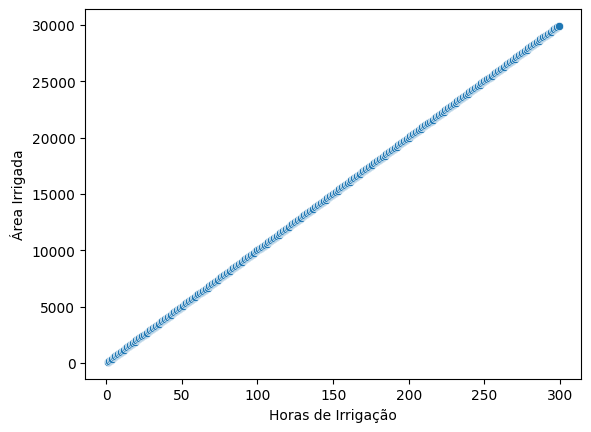

In [7]:
sns.scatterplot(data=df_irigacao, x='Horas de Irrigação', y='Área Irrigada')

<Axes: ylabel='Área Irrigada'>

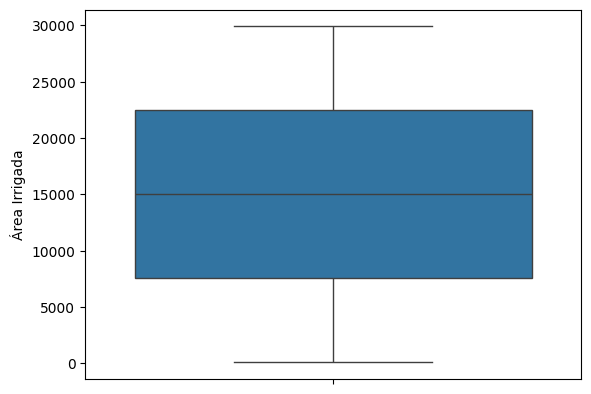

In [8]:
sns.boxplot(df_irigacao, y='Área Irrigada')

<Axes: ylabel='Horas de Irrigação'>

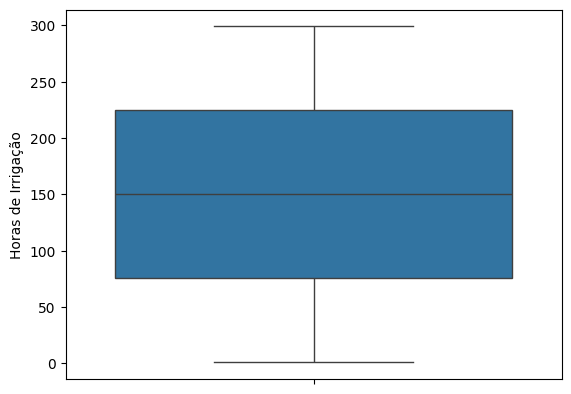

In [9]:
sns.boxplot(df_irigacao, y='Horas de Irrigação')

<Axes: >

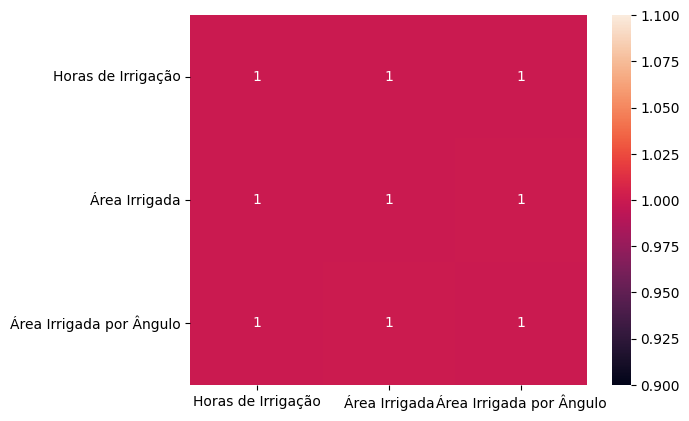

In [10]:
sns.heatmap(df_irigacao.corr('pearson'), annot=True)

<Axes: >

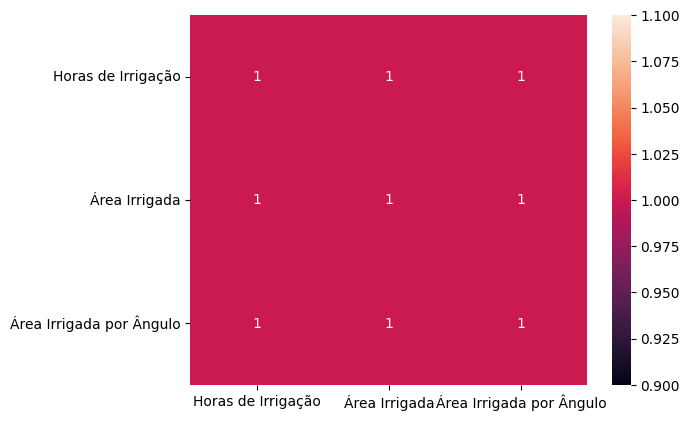

In [11]:
sns.heatmap(df_irigacao.corr('spearman'), annot=True)

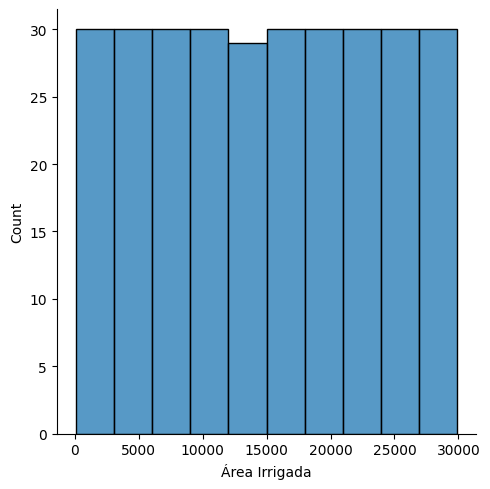

In [12]:
sns.displot(df_irigacao, x='Área Irrigada')

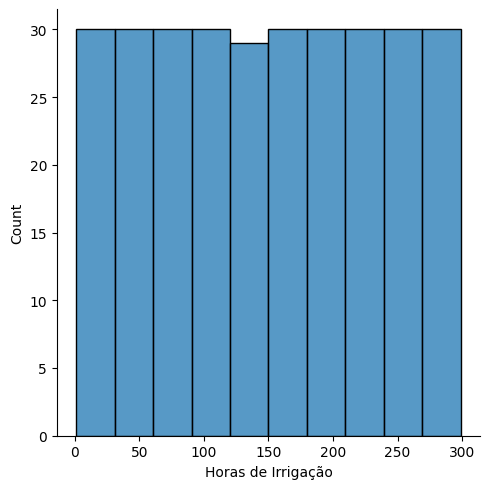

In [13]:
sns.displot(df_irigacao, x='Horas de Irrigação')

## Treinar Modelo

In [14]:
X = df_irigacao['Horas de Irrigação'].values.reshape(-1,1)
y = df_irigacao['Área Irrigada'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)

In [15]:
reg_model = LinearRegression()

In [16]:
reg_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("A equação da reta é y = {:4f}x + {:4f}".format(reg_model.coef_[0][0], reg_model.intercept_[0]))


A equação da reta é y = 100.000000x + 0.000000


## Validar Modelo

In [18]:
y_pred = reg_model.predict(X_test)

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [20]:
# MSE
mean_squared_error(y_test, y_pred)

6.632559615610195e-24

In [21]:
# MAE
mean_absolute_error(y_test,y_pred)

2.0747847884194925e-12

### Análise de Resíduos

In [22]:
residuos = y_test - y_pred

In [23]:
from scipy.stats import zscore
residuos_std = zscore(residuos)

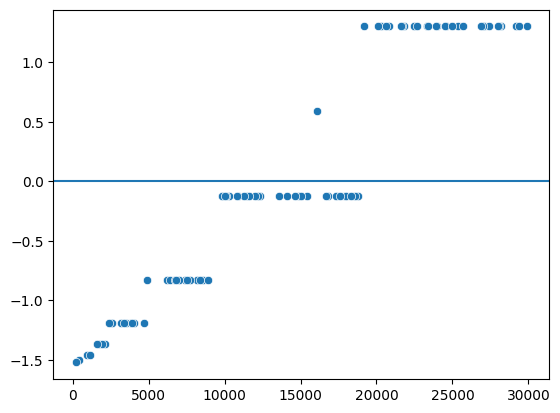

In [24]:
sns.scatterplot(x=y_pred.reshape(-1), y=residuos_std.reshape(-1))
plt.axhline(y=0)

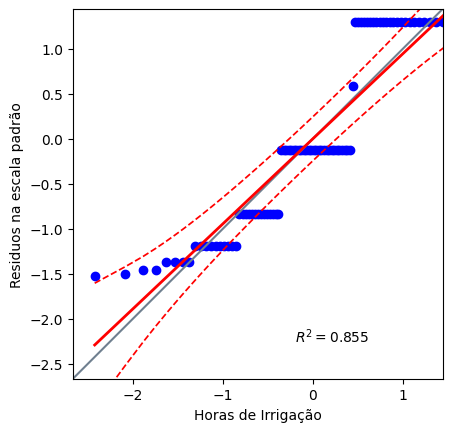

In [25]:
import pingouin as pg
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Horas de Irrigação')
plt.ylabel('Residuos na escala padrão')
plt.show()

In [26]:
stat_shapiro, p_valor_shapiro = shapiro(residuos.reshape(-1))
print("Estatística do teste: {} e P-Valor: {}".format(stat_shapiro, p_valor_shapiro))

Estatística do teste: 0.843426074705569 e P-Valor: 2.4969091110992924e-08


In [27]:
stat_ks, p_valor_ks = kstest(residuos.reshape(-1), 'norm')
print("Estatística do teste: {} e P-Valor: {}". format(stat_ks, p_valor_ks))

Estatística do teste: 0.4999999999985713 e P-Valor: 2.486951502302656e-21


### Fazer predições com o modelo

In [28]:
reg_model.predict([[15]])

array([[1500.]])

In [29]:
reg_model.predict([[75.50]])

array([[7550.]])

In [30]:
reg_model.predict([[150]])

array([[15000.]])

In [31]:
reg_model.predict([[224.50]])

array([[22450.]])

In [32]:
reg_model.predict([[299]])

array([[29900.]])

In [33]:
reg_model.predict([[2]])

array([[200.]])

In [34]:
import joblib
joblib.dump(reg_model, './regressaoLinear.pkl')

['./regressaoLinear.pkl']